# Bars

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

jtplot.style(figsize=(15, 9))

In [9]:
trades = pd.read_csv('../data/order_book/BK_24_04.csv')
trades.head()

,Time,Bid,Ask,Last,Volume,Type
0,2023.04.24 13:46:02.843,44.02,44.03,44.03,100.0,Buy
1,2023.04.24 13:46:02.843,44.02,44.03,44.03,100.0,Buy
2,2023.04.24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
3,2023.04.24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
4,2023.04.24 13:46:04.876,44.01,44.02,44.02,100.0,Buy


In [10]:
trades['Value $'] = trades['Last'] * trades['Volume']
trades.head()

,Time,Bid,Ask,Last,Volume,Type,Value $
0,2023.04.24 13:46:02.843,44.02,44.03,44.03,100.0,Buy,4403.0
1,2023.04.24 13:46:02.843,44.02,44.03,44.03,100.0,Buy,4403.0
2,2023.04.24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
3,2023.04.24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
4,2023.04.24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0


In [11]:
trades.Time = pd.to_datetime(trades.Time)
trades.set_index('Time', inplace=True)

<AxesSubplot:xlabel='Time'>

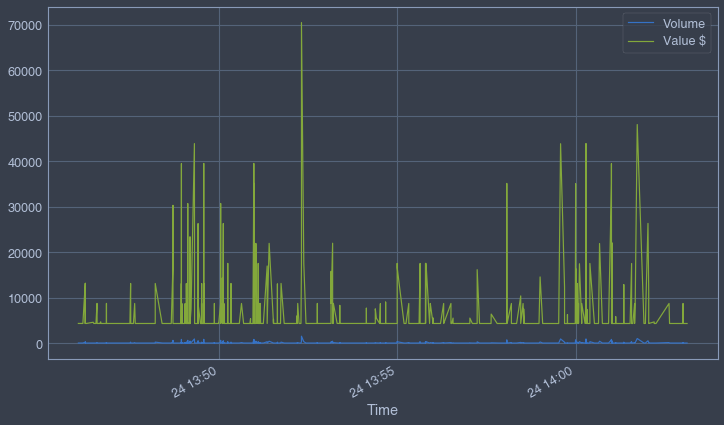

In [15]:
trades[['Volume', 'Value $']].plot()

In [16]:
trades

,Bid,Ask,Last,Volume,Type,Value $
Time,,,,,,
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy,4403.0
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy,4403.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
...,...,...,...,...,...,...
2023-04-24 14:03:00.814,43.93,43.94,43.93,100.0,Sell,4393.0
2023-04-24 14:03:01.235,43.93,43.94,43.93,100.0,Sell,4393.0
2023-04-24 14:03:06.862,43.93,43.94,43.94,100.0,Buy,4394.0


In [20]:
mask = (trades.index > dt.datetime(2023, 4, 24, 13, 40, 0)) & (trades.index <= dt.datetime(2023, 4, 24, 13, 50, 0))
trades_mh = trades.iloc[mask]
trades_mh.head()

,Bid,Ask,Last,Volume,Type,Value $
Time,,,,,,
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy,4403.0
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy,4403.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0


In [24]:
trades.loc['2023-04-24 13:46:04']

,Bid,Ask,Last,Volume,Type,Value $
Time,,,,,,
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy,4402.0


## Time Bars

In [25]:
time_bars = trades.groupby(pd.Grouper(freq='1min')).agg({'Last': 'ohlc', 'Volume': 'sum'})
time_bars_price = time_bars.loc[:, 'Last']
time_bars_price

,open,high,low,close
Time,,,,
2023-04-24 13:46:00,44.03,44.03,43.97,43.97
2023-04-24 13:47:00,43.97,43.97,43.95,43.96
2023-04-24 13:48:00,43.96,43.96,43.92,43.93
2023-04-24 13:49:00,43.93,43.96,43.90,43.94
2023-04-24 13:50:00,43.95,43.99,43.92,43.96
2023-04-24 13:51:00,43.97,44.00,43.97,43.98
2023-04-24 13:52:00,43.99,44.02,43.98,44.01
2023-04-24 13:53:00,44.02,44.06,44.02,44.04
2023-04-24 13:54:00,44.04,44.04,43.93,43.95


In [26]:
time_bars

Last                        Volume
                      open   high    low  close   Volume
Time                                                    
2023-04-24 13:46:00  44.03  44.03  43.97  43.97   4815.0
2023-04-24 13:47:00  43.97  43.97  43.95  43.96   4600.0
2023-04-24 13:48:00  43.96  43.96  43.92  43.93   9718.0
2023-04-24 13:49:00  43.93  43.96  43.90  43.94  29064.0
2023-04-24 13:50:00  43.95  43.99  43.92  43.96  17062.0
2023-04-24 13:51:00  43.97  44.00  43.97  43.98   8966.0
2023-04-24 13:52:00  43.99  44.02  43.98  44.01   5166.0
2023-04-24 13:53:00  44.02  44.06  44.02  44.04   5550.0
2023-04-24 13:54:00  44.04  44.04  43.93  43.95   4259.0
2023-04-24 13:55:00  43.96  43.98  43.95  43.97   5354.0
2023-04-24 13:56:00  43.96  43.97  43.95  43.96   2311.0
2023-04-24 13:57:00  43.95  43.95  43.94  43.94   2643.0
2023-04-24 13:58:00  43.94  43.96  43.91  43.92   4193.0
2023-04-24 13:59:00  43.92  43.92  43.88  43.89   6278.0
2023-04-24 14:00:00  43.88  43.96  43.88  43.91  15206.0
2023-04-24 14:01:00  43.90  43.97  43.89  43.97  11608.0
2023-04-24 14:02:00  43.97  43.97  43.95  43.95   2772.0
2023-04-24 14:03:00  43.95  43.95  43.93  43.93   1400.0

In [27]:
time_bars = np.log(time_bars_price.close/time_bars_price.close.shift(1)).dropna()
time_bars

Time
2023-04-24 13:47:00   -0.000227
2023-04-24 13:48:00   -0.000683
2023-04-24 13:49:00    0.000228
2023-04-24 13:50:00    0.000455
2023-04-24 13:51:00    0.000455
2023-04-24 13:52:00    0.000682
2023-04-24 13:53:00    0.000681
2023-04-24 13:54:00   -0.002046
2023-04-24 13:55:00    0.000455
2023-04-24 13:56:00   -0.000227
2023-04-24 13:57:00   -0.000455
2023-04-24 13:58:00   -0.000455
2023-04-24 13:59:00   -0.000683
2023-04-24 14:00:00    0.000456
2023-04-24 14:01:00    0.001365
2023-04-24 14:02:00   -0.000455
2023-04-24 14:03:00   -0.000455
Freq: T, Name: close, dtype: float64

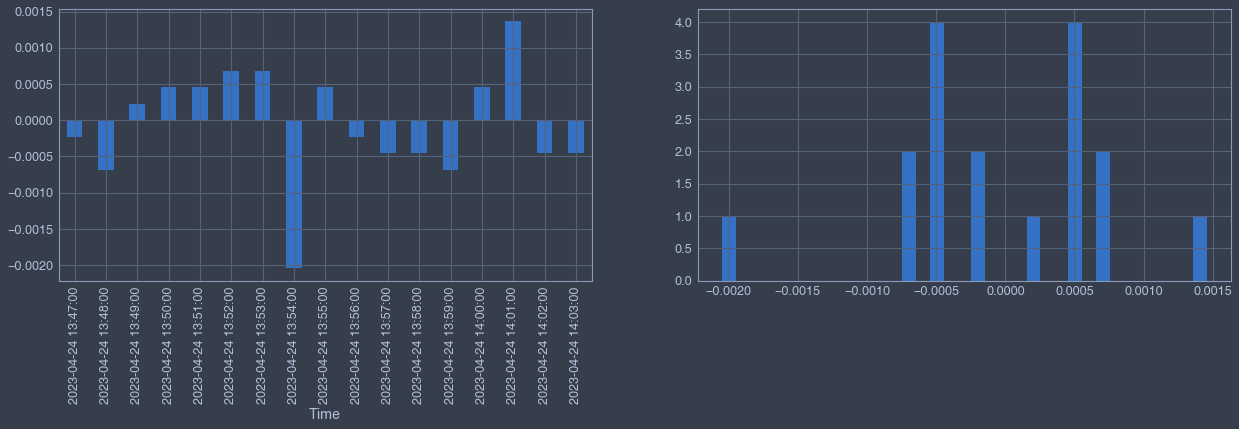

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(21, 5))

time_bars.plot(kind='bar', ax=ax[0])

bin_len = 0.0001
ax[1] = plt.hist(time_bars, bins=np.arange(min(time_bars), max(time_bars)+bin_len, bin_len));
